#Линейный тренд

Задача:

1. Рассчитать основные статистические оценки.
2. Построить график линии тренда (линейная аппроксимация) для каждой станции.
3. Проанализировать и сравнить результаты, полученные для разных участков Балтийского моря.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
df = pd.read_csv("Baltic_Sea_1991_2000.csv", sep=";", header=0)

In [34]:
n_days = len(df)

In [35]:
days = np.arange(-(n_days // 2), (n_days // 2) + 1) if n_days % 2 != 0 else np.arange(-(n_days // 2), (n_days // 2))
summa = np.add.reduce(days**2, dtype=np.int64)

In [36]:
df['Day'] = days

In [37]:
df_stats = df.drop(columns=['Day']).describe()
print(df_stats)

       Near Yantarnii     Near SPB  Near Finland
count     3653.000000  3653.000000   3653.000000
mean         9.433156     6.826266      5.117123
std          5.519558     6.238672      5.514186
min          0.140000    -1.700000     -1.800000
25%          4.370000     0.750000      0.170000
50%          8.470000     5.550000      3.330000
75%         14.300000    12.570000      9.950000
max         23.110000    20.620000     18.740000


In [38]:
strings = np.arange(len(df))

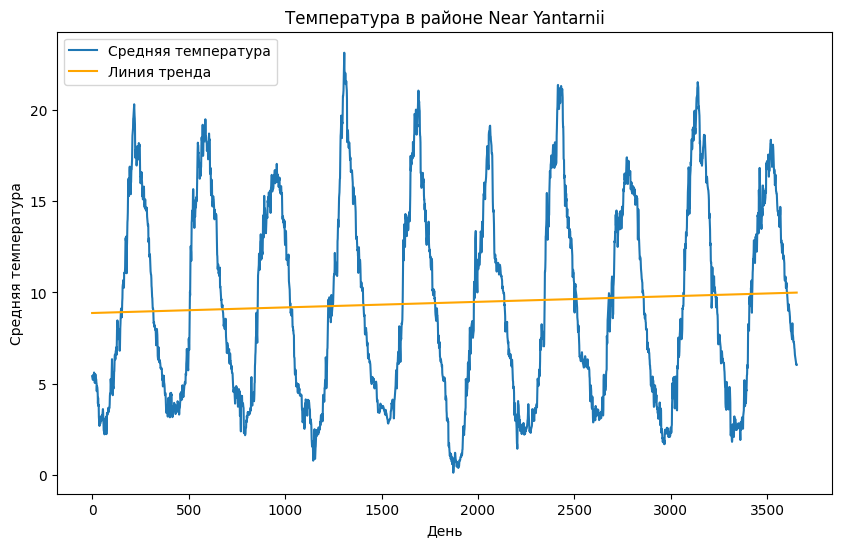

Уравнение линии тренда для Near Yantarnii:
0.00031x + 9.43316
Наблюдается положительная тенденция в районе Near Yantarnii, температура повышается.
------------------------------


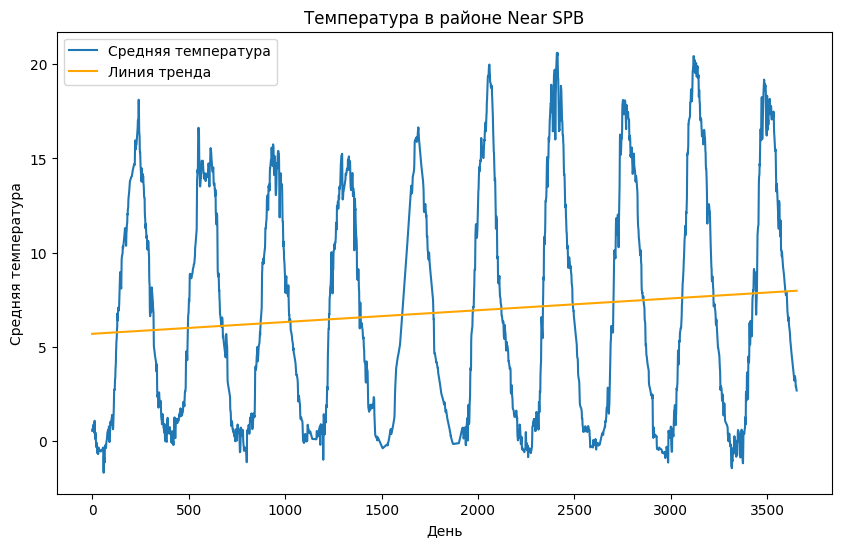

Уравнение линии тренда для Near SPB:
0.00063x + 6.82627
Наблюдается положительная тенденция в районе Near SPB, температура повышается.
------------------------------


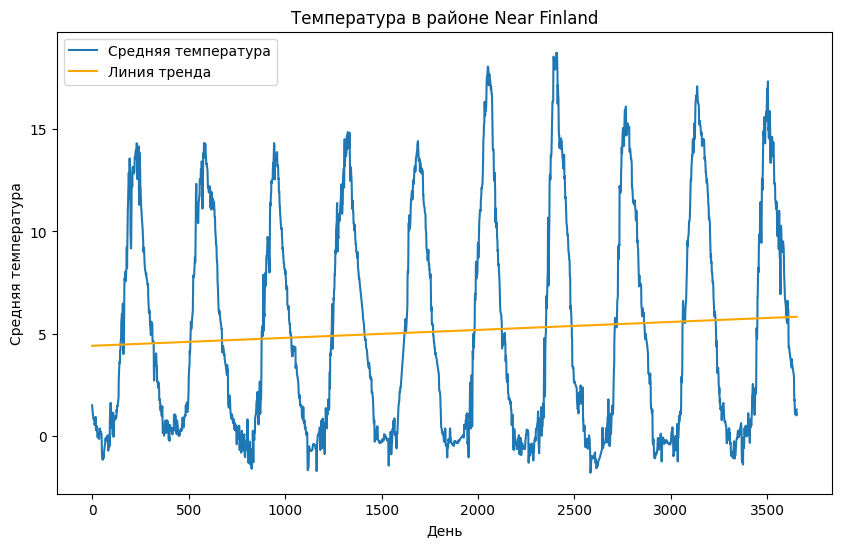

Уравнение линии тренда для Near Finland:
0.00039x + 5.11712
Наблюдается положительная тенденция в районе Near Finland, температура повышается.
------------------------------


In [39]:
stations = ['Near Yantarnii', 'Near SPB', 'Near Finland']
for station in stations:
    x = df['Day'].values
    y = df[station].values

    a0 = np.sum(y) / len(df)
    a1 = np.sum(x * y) / summa

    plt.figure(figsize=(10, 6))
    plt.plot(strings, y, label='Средняя температура')
    plt.plot(strings, a1 * x + a0, label='Линия тренда', color='orange')
    plt.title(f'Температура в районе {station}')
    plt.xlabel('День')
    plt.ylabel('Средняя температура')
    plt.legend()
    plt.show()

    print(f'Уравнение линии тренда для {station}:')
    print(f'{a1:.5f}x + {a0:.5f}')

    if a1 > 0:
        print(f'Наблюдается положительная тенденция в районе {station}, температура повышается.')
    elif a1 < 0:
        print(f'Наблюдается отрицательная тенденция в районе {station}, температура понижается.')
    else:
        print(f'В районе {station} отсутствует выраженная тенденция, температура стабильна.')

    print('-' * 30)
